In [129]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import backend as K
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
# one-hot encoding
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
import pathlib
import PIL
import numpy as np
import matplotlib.pyplot as plt 


In [105]:
leaf_folder = 'leaf_test/'

In [106]:
import os 
classes = []
for i in os.listdir(leaf_folder):
    classes.append(i)

In [107]:
print(classes)

['Acer_Campestre', 'Alnus_Sieboldiana', 'Cotinus_Coggygria', 'Eucalyptus_Glaucescens', 'Ginkgo_Biloba', 'Liriodendron_Tulipifera', 'Prunus_X_Shmittii', 'Quercus_Phellos', 'Quercus_x_Hispanica', 'Zelkova_Serrata']


In [108]:
leaf_folder_path = pathlib.Path(leaf_folder)
images = list(leaf_folder_path.glob('*/*'))
len(images)
image_size = (550,475)

In [109]:
train_ds = image_dataset_from_directory(
    leaf_folder_path,
    validation_split=0.2,
    batch_size = 10,
    subset = 'training', 
    label_mode = 'categorical',
    image_size=image_size,
    class_names =classes,
    seed = 12
)

Found 160 files belonging to 10 classes.
Using 128 files for training.


In [110]:
for images,labels in train_ds.take(1):
    first_set=images
    print(type(images))
first_set.shape

<class 'tensorflow.python.framework.ops.EagerTensor'>


TensorShape([10, 550, 475, 3])

In [111]:
val_ds = image_dataset_from_directory(
    leaf_folder_path,
    validation_split=0.2,
    subset="validation",
    label_mode = 'categorical',
    image_size=image_size,
    batch_size=10,
    class_names=classes,
    seed = 12
)

Found 160 files belonging to 10 classes.
Using 32 files for validation.


In [96]:
# this works well so far
data_augmentation=Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal',input_shape=(550,475,3)),
    layers.experimental.preprocessing.RandomFlip('vertical',input_shape=(550,475,3)), 
    layers.experimental.preprocessing.RandomRotation(0.4)
])

In [124]:
model=Sequential([
                         data_augmentation,
                         layers.Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu'),
                         layers.MaxPool2D(pool_size=(2,2)),
                         layers.Dropout(0.25),
                         layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
                         layers.MaxPool2D(pool_size=(2,2)),
                         layers.Dropout(0.3),
                         layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
                         layers.MaxPool2D(pool_size=(2,2)),
                         layers.Dropout(0.25),
                         layers.Flatten(),
                         layers.Dense(units=40,activation='relu'),
                         layers.Dense(units=len(classes),activation='softmax')
])

In [148]:
# set batch size and epochs
batch_size = 30
epochs = 15
# Here we adjust learning rate
K.set_value(model.optimizer.learning_rate, 0.001)

In [149]:
#keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [150]:
history = model.fit(train_ds, epochs=epochs, validation_data=val_ds,)

Epoch 1/15
13/13 [==============================] - 21s 2s/step - loss: 0.9382 - accuracy: 0.6562 - val_loss: 1.9219 - val_accuracy: 0.4688
Epoch 2/15
13/13 [==============================] - 19s 1s/step - loss: 0.9667 - accuracy: 0.6875 - val_loss: 1.5427 - val_accuracy: 0.5625
Epoch 3/15
13/13 [==============================] - 20s 2s/step - loss: 0.8485 - accuracy: 0.6875 - val_loss: 1.4001 - val_accuracy: 0.6250
Epoch 4/15
13/13 [==============================] - 21s 2s/step - loss: 0.7738 - accuracy: 0.7188 - val_loss: 2.0177 - val_accuracy: 0.4375
Epoch 5/15
13/13 [==============================] - 21s 2s/step - loss: 0.8364 - accuracy: 0.7188 - val_loss: 1.6570 - val_accuracy: 0.6562
Epoch 6/15
13/13 [==============================] - 20s 2s/step - loss: 0.8017 - accuracy: 0.7031 - val_loss: 1.5203 - val_accuracy: 0.6875
Epoch 7/15
13/13 [==============================] - 20s 2s/step - loss: 0.8709 - accuracy: 0.7031 - val_loss: 1.9598 - val_accuracy: 0.5312
Epoch 8/15
13/13 [==

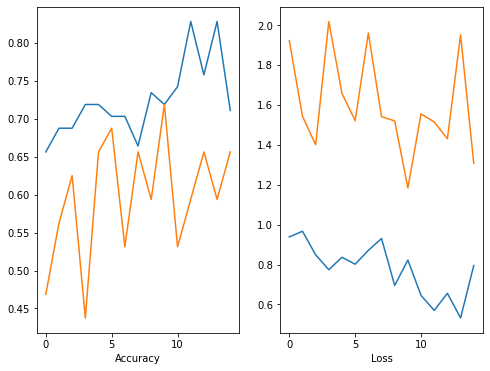

In [151]:
## Plot performance
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='training')
plt.plot(history.history['val_accuracy'],label='validation')
plt.xlabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='training')
plt.plot(history.history['val_loss'],label='validation')
plt.xlabel('Loss')

plt.show()